In [1]:
# import relevant packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix 
from sklearn import tree
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier


In [2]:
# read in the data

titanic_df = pd.read_csv("titanic.csv")


CLEANING

In [3]:
# use .info to get an overview of where there might be missing data 

titanic_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# since Embarked has two rows with nan values, we'll just get rid of those two rows 

# First, find out which rows they are
titanic_df[titanic_df['Embarked'].isna()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [5]:
# since Age and Cabin have a lot of missing data, delete those columns 

for i in 'Cabin', 'Age':
    titanic_df.drop(i, axis=1, inplace=True)


In [6]:
# delete irrelevant columns 

for i in 'Name', 'Ticket':
    titanic_df.drop(i, axis=1, inplace=True)

In [7]:
# then, drop those rows 

for i in titanic_df.index:
    if titanic_df['PassengerId'][i] == 62 or titanic_df['PassengerId'][i]== 830:
        titanic_df.drop(i, axis = 0, inplace=True)

PREPROCESSING

In [9]:
# Get dummies of categorical variables Sex, Pclass and Embarked

titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"],  dtype = int)

titanic_df = pd.get_dummies(titanic_df, prefix="Pclass", columns=["Pclass"], dtype = int)

titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"], dtype = int)



In [10]:
# Scale the Fare column

# there were some problems with values missing after scaling, so i have filled them 

mean_fare = titanic_df['Fare'].mean()
titanic_df['Fare'].fillna(mean_fare, inplace=True)

# the actual scaling 

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(titanic_df['Fare'].values.reshape(-1, 1))
titanic_df['Fare'] = scaled_values

TRAINING THE MODEL

In [11]:
# Select relevant variables from the data as independent
# I will use SibSp, Parch, Fare, Sex and Embarked as independent variables
# set x to the independent variables
tit_cols = []
for i in titanic_df.columns[2:]:
    tit_cols.append(i)
tit_cols
x = titanic_df[tit_cols]

# the independent variable is Survived - set y to the independent variable

y = titanic_df['Survived']


In [12]:
# split the data into a training, development, and test set

x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

x_train, x_dev, y_train, y_dev = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42) 




In [13]:
# Train a decision tree and TRAIN IT

# make the model

DTree = DecisionTreeClassifier()

# train it 
DTree.fit(x_train_full, y_train_full)



DecisionTreeClassifier()

TESTING AND EVALUATING THE MODEL

In [14]:
# Define a new function to compute a decision tree model's accuracy using a confusion matrix 
# accuracy is (TP+TN)/(TP+TN+FP+FN)

def acc_score(x, y):
    confm = confusion_matrix(x, y)
    z = (confm[0,0] + confm[1,1])/(confm[0,0] + confm[1,1] + confm[0,1] + confm[1,0])
    return z

In [15]:
# Compute the model’s accuracy 

preds = DTree.predict(x_dev)
acc_calc = acc_score(y_dev, preds)
print(f'Accuracy: {str(acc_calc)}')



Accuracy: 0.916083916083916


In [16]:
# model with different values of the max_depth [2-10]. At each step, create a plot of your tree and store the accuracies
# first for the development set 

range_depths = range(2, 10)
accuracies_dev = [] 

for d in range_depths:
    Pr_DTree = DecisionTreeClassifier(max_depth=d, random_state=2)
    Pr_DTree.fit(x_train_full, y_train_full)
    preds = Pr_DTree.predict(x_dev)
    acc = acc_score(y_dev, preds)
    accuracies_dev.append(acc)
    fig = plt.figure()
    #tree.plot_tree(Pr_DTree, rounded = True, precision = 2, proportion = False, filled = True)
    #fig.savefig(f'pruned_tree{str(1)}.png')

best_depth_dev = range_depths[np.argmax(accuracies_dev)]
Pr_DTree_dev = DecisionTreeClassifier(max_depth = best_depth_dev, random_state=2)
Pr_DTree_dev.fit(x_train_full, y_train_full)





DecisionTreeClassifier(max_depth=9, random_state=2)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [17]:
# then for the training set 

accuracies_train = [] 

for d in range_depths:
    Pr_DTree = DecisionTreeClassifier(max_depth=d, random_state=2)
    Pr_DTree.fit(x_train_full, y_train_full)
    preds = Pr_DTree.predict(x_train_full)
    acc = acc_score(y_train_full, preds)
    accuracies_train.append(acc)
    fig = plt.figure()
    #tree.plot_tree(Pr_DTree, rounded = True, precision = 2, proportion = False, filled = True)
    #fig.savefig(f'pruned_tree{str(1)}.png')

best_depth_train = range_depths[np.argmax(accuracies_train)]
Pr_DTree_train = DecisionTreeClassifier(max_depth = best_depth_train, random_state=2)
Pr_DTree_train.fit(x_train_full, y_train_full)

DecisionTreeClassifier(max_depth=9, random_state=2)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [18]:
# Say what the best max depth parameter setting is

print(f'The best max depth parameter setting is {best_depth_dev} for the development set and {best_depth_train} for the training set')



The best max depth parameter setting is 9 for the development set and 9 for the training set


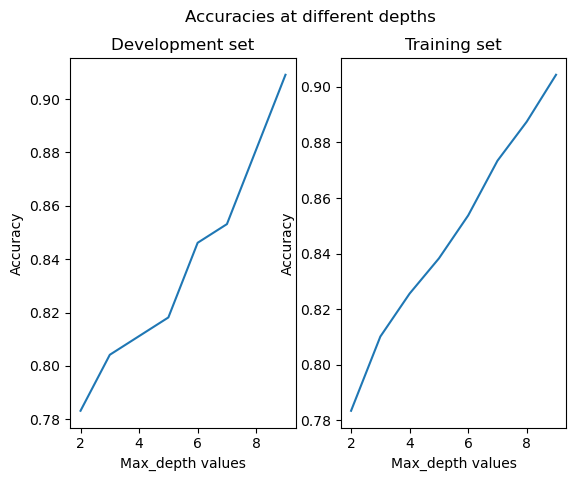

In [19]:
# Plot a graph with a line of training accuracies and another of development accuracies 

fig, ax = plt.subplots(1, 2)
ax[0].plot(range_depths, accuracies_dev)
ax[1].plot(range_depths, accuracies_train)
ax[0].set_xlabel("Max_depth values") 
ax[0].set_ylabel("Accuracy") 
ax[0].set_title('Development set')
ax[1].set_title('Training set')
ax[1].set_xlabel("Max_depth values") 
ax[1].set_ylabel("Accuracy") 
plt.suptitle('Accuracies at different depths')
plt.show()



In [20]:
# Report the accuracy of the final model
preds = Pr_DTree_train.predict(x_test)
acc_calc = acc_score(y_test, preds)
print(f'Accuracy for the final model: {str(acc_calc)}')


Accuracy for the final model: 0.7584269662921348


TASK 3 - Random forests

In [60]:
# create a Random Forest

# fit the model

forest = RandomForestClassifier(n_estimators=100, random_state=7)
forest.fit(x_train_full, y_train_full)

# predictions 

rf_preds_dev = forest.predict(x_dev)
rf_preds_train = forest.predict(x_train_full)


# evaluate 

acc_dev = acc_score(y_dev, rf_preds_dev)
acc_train = acc_score(y_train_full, rf_preds_train)


print(acc_dev, '\n', acc_train)


0.8951048951048951 
 0.9085794655414908


In [59]:
# Create a Bagged tree 

# base model 

base = DecisionTreeClassifier()
base.fit(x_train_full,y_train_full)

# bagged model

bagged = BaggingClassifier(estimator = base, random_state=7)

bagged.fit(x_train_full, y_train_full)

# predictions 

preds = bagged.predict(x_test)

# evaluate 

acc_dev = acc_score(y_test, preds)


print(f'Accuracy for  bagged model: {acc}')


Accuracy for  bagged model: 0.7921348314606742


In [58]:
# train and evaluate a boosted classifier

# create and train the tree 

boosted = AdaBoostClassifier(estimator = base, n_estimators=100, random_state=7)

boosted.fit(x_train_full, y_train_full)

# predictions 

preds = boosted.predict(x_test)

# evaluate 

acc = acc_score(y_test, preds)

print(f'Accuracy for  boosted model: {acc}')


Accuracy for  boosted model: 0.7921348314606742


In [24]:
#  determine which feature contributes the most to the predictions in the Random Forest model 

feature_imp = pd.Series(forest.feature_importances_).sort_values(ascending=False)
feature_imp




2     0.380663
3     0.174261
4     0.148044
7     0.068147
0     0.067690
1     0.065429
5     0.029863
10    0.018966
8     0.018490
6     0.017572
9     0.010873
dtype: float64

The most important features are Fare and Sex (Classes 2, 3 and 4 from the training set)

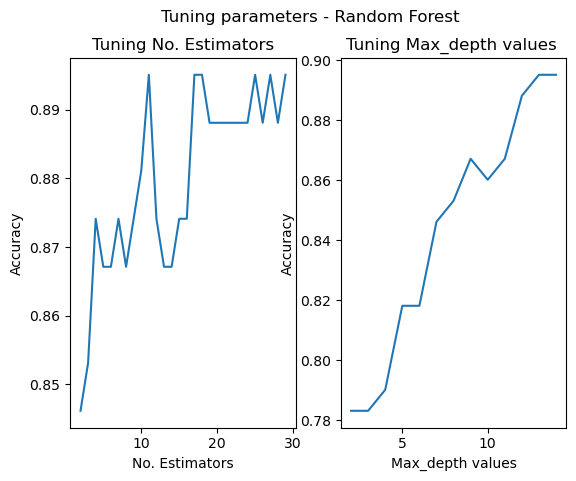

In [54]:
# Pick which method to use and tune the parameters n_estimators and max_depth

# for every n_estimators value, record its accuracy 

accs_ne = []

for i in range(2, 25):
    forest = RandomForestClassifier(n_estimators=i, random_state=7)
    forest.fit(x_train_full, y_train_full)
    rf_preds_dev = forest.predict(x_dev)
    acc_dev = acc_score(y_dev, rf_preds_dev)
    accs_ne.append(acc_dev)

# for every max_depth value, record its accuracy 

accs_md = []

for i in range(2, 12):
    forest = RandomForestClassifier(max_depth = i, random_state=7)
    forest.fit(x_train_full, y_train_full)
    rf_preds_dev = forest.predict(x_dev)
    acc_dev = acc_score(y_dev, rf_preds_dev)
    accs_md.append(acc_dev)


# plot accuracy at the different parameter values

fig, ax = plt.subplots(1, 2)
ax[0].plot(range(2, 25), accs_ne)
ax[1].plot(range(2, 12), accs_md)
ax[0].set_xlabel("No. Estimators") 
ax[0].set_ylabel("Accuracy") 
ax[0].set_title("Tuning No. Estimators")
ax[1].set_title('Tuning Max_depth values ')
ax[1].set_xlabel("Max_depth values") 
ax[1].set_ylabel("Accuracy") 
plt.suptitle('Tuning parameters - Random Forest')
plt.show()

In [57]:
# report which model, with its n_estimators and max_depth parameters, performed the best 

best_md = range(2, 12)[np.argmax(accs_md)]
best_ne = range(2, 25)[np.argmax(accs_ne)]


rf = RandomForestClassifier(max_depth = best_md, n_estimators = best_ne, random_state=2)
rf.fit(x_train_full, y_train_full)
preds = rf.predict(x_test)
acc = acc_score(y_test, preds)

print(f'Model - \n\nRandom forest \nmax_depth: {str(best_md)} \nn_estimators: {str(best_ne)} \n\nFinal Accuracy: {str(acc)} \n')

Model - 

Random forest, 
max_depth: 13 
n_estimators: 11 

Final Accuracy: 0.797752808988764 

